In [11]:
import os
import random
import shutil
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [12]:
# Define the paths to the original image and annotation folders
image_folder = "/home/pradeep/Data_Exploration/DataSets"
annot_folder = "/home/pradeep/Data_Exploration/Annotation"

# Define the paths to the organized data folder
organized_data_folder = "/home/pradeep/Data_Exploration"

# Create organized data folder if it doesn't exist
if not os.path.exists(organized_data_folder):
    os.makedirs(organized_data_folder)

# Function to organize images and annotations
def organize_data(image_folder, annot_folder, organized_data_folder):
    for category_folder in os.listdir(image_folder):
        category_image_folder = os.path.join(image_folder, category_folder)
        category_annot_folder = os.path.join(annot_folder, category_folder)
        if os.path.isdir(category_image_folder) and os.path.isdir(category_annot_folder):
            organized_category_folder = os.path.join(organized_data_folder, category_folder)
            os.makedirs(organized_category_folder, exist_ok=True)
            for image_file in os.listdir(category_image_folder):
                if image_file.endswith(".JPEG"):
                    image_path = os.path.join(category_image_folder, image_file)
                    xml_file = os.path.splitext(image_file)[0] + ".xml"
                    if xml_file in os.listdir(category_annot_folder):
                        shutil.copy(image_path, organized_category_folder)
                        shutil.copy(os.path.join(category_annot_folder, xml_file), organized_category_folder)

# Organize data
organize_data(image_folder, annot_folder, organized_data_folder)


In [13]:
# Define functions to load annotations and images
def load_annotations(organized_data_folder):
    annotations = {}
    for root, dirs, files in os.walk(organized_data_folder):
        for file in files:
            if file.endswith(".xml"):
                xml_path = os.path.join(root, file)
                tree = ET.parse(xml_path)
                boxes = []
                for obj in tree.findall('object'):
                    xmin = int(obj.find('bndbox').find('xmin').text)
                    ymin = int(obj.find('bndbox').find('ymin').text)
                    xmax = int(obj.find('bndbox').find('xmax').text)
                    ymax = int(obj.find('bndbox').find('ymax').text)
                    boxes.append((xmin, ymin, xmax, ymax))
                annotations[file] = boxes
    return annotations

In [14]:
def load_images(organized_data_folder):
    images = {}
    for root, dirs, files in os.walk(organized_data_folder):
        for file in files:
            if file.endswith(".JPEG"):
                image_path = os.path.join(root, file)
                xml_file = os.path.splitext(file)[0] + ".xml"
                if xml_file in os.listdir(root):
                    images[file] = os.path.join(root, file)
    return images

In [15]:
# Load annotations and images
annotations = load_annotations(organized_data_folder)
images = load_images(organized_data_folder)


In [16]:
# Define function to calculate overlap percentage between bounding boxes
def calculate_overlap_percentage(box1, box2, name1, name2):
    # Calculate intersection area
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    
    # Calculate union area
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - intersection_area
    
    # Calculate overlap percentage
    overlap_percentage = intersection_area / union_area
    print(f"Overlap between {name1} and {name2}: {overlap_percentage:.2%}")


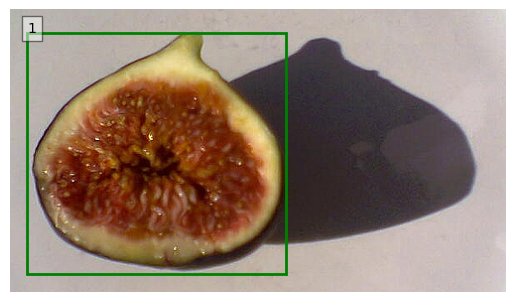

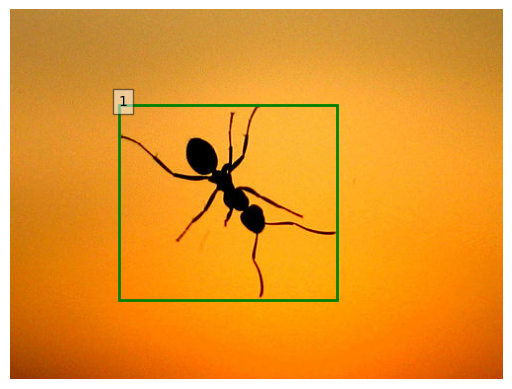

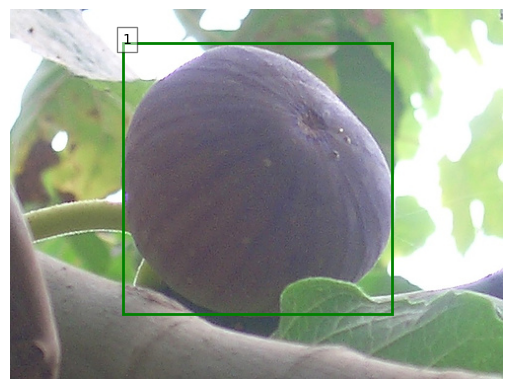

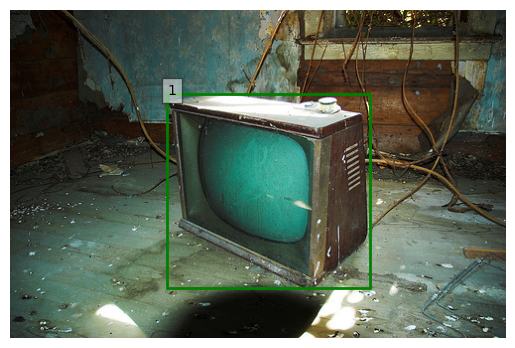

Overlap between 1 and 2: 0.00%
Overlap between 1 and 3: 0.00%
Overlap between 2 and 3: 9.74%


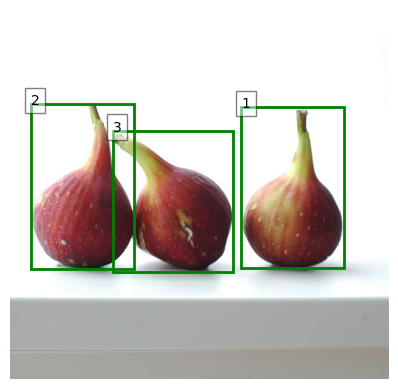

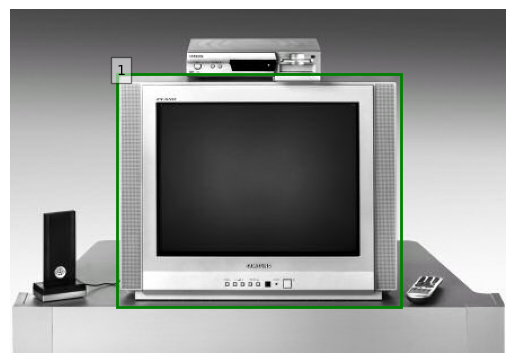

Overlap between 1 and 2: 0.00%


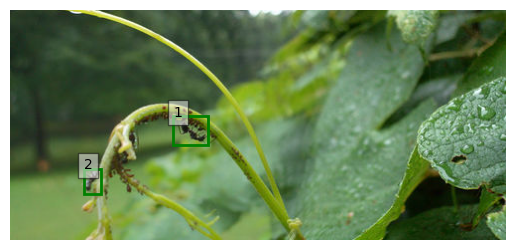

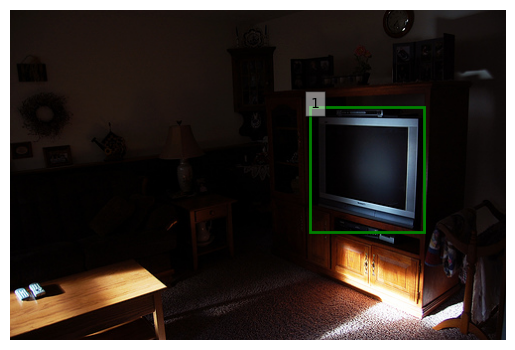

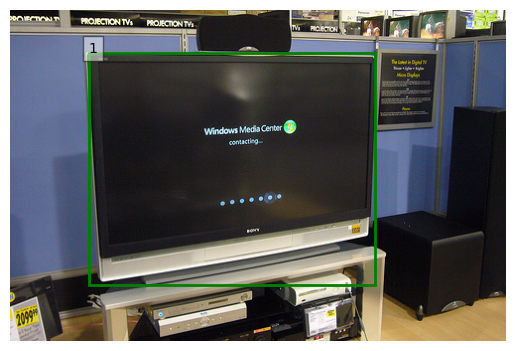

Overlap between 1 and 2: 0.00%
Overlap between 1 and 3: 1.86%
Overlap between 1 and 4: 0.00%
Overlap between 2 and 3: 1.53%
Overlap between 2 and 4: 0.00%
Overlap between 3 and 4: 22.85%


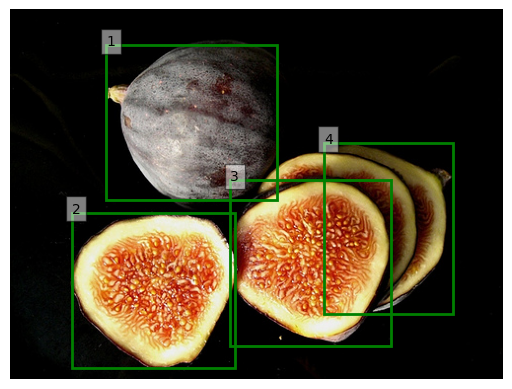

In [19]:
# Define function to plot annotations and calculate overlap
def plot_annotations(images, num_samples=10):
    random_images = random.sample(list(images.keys()), num_samples)
    for image in random_images:
        image_path = images[image]
        img = plt.imread(image_path)

        xml_file = os.path.splitext(image)[0] + ".xml"
        boxes = annotations.get(xml_file, [])

        fig, ax = plt.subplots(1)
        ax.imshow(img)

        for i, box in enumerate(boxes, 1):
            xmin, ymin, xmax, ymax = box
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
            ax.add_patch(rect)
            ax.text(xmin, ymin, str(i), bbox=dict(facecolor='white', alpha=0.5))
        
        if len(boxes) > 1:
            for i in range(len(boxes)):
                for j in range(i + 1, len(boxes)):
                    calculate_overlap_percentage(boxes[i], boxes[j], str(i+1), str(j+1))

        ax.axis('off')
        plt.show()

# Plot annotations and calculate overlap for randomly selected images
plot_annotations(images)
